# <center>Wine Quality Prediction Project</center>

## Objective

 
   - The objective of this project is to predict the quality of wine as bad-good (scale 1-10) using machine learning algorithms in Python. The dataset is used to create models to predict the quality of wine through different parameters like fixed acidity, volatile acidity etc. 
   - Multiple Classification models are applied and the accuracy score for the different models are compared. 
   - The model with best accuracy score will be used to help predict the quality of the wine as Good or Bad 


In [1]:
# importing the needed libraries
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for outlier detection and removal
from scipy.stats import zscore

# for detection of multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# for data scaling
from sklearn.preprocessing import StandardScaler

# for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

# for hyper parameter tuning
import time
from sklearn.model_selection import GridSearchCV

# for display of model comparisons
from IPython.display import HTML

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the Data

In [2]:
# reading the wine quality dataset
wine_data = pd.read_csv("QualityPrediction.csv")

## Exploratory Data Analysis

In [3]:
# inspecting the first 5 rows of wine quality data
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# displaying all the features(columns) in the wine_data
print(wine_data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
# a peek into the dataset
wine_data.shape


(1599, 12)

<b>The dataset has 1599 observations and 12 columns</b>

In [6]:
# looking at the unique values of the target variable
print("The unique values of the target varible (Quality) are: "+ str(wine_data['quality'].unique()))

The unique values of the target varible (Quality) are: [5 6 7 4 8 3]


### Checking for Null Values

In [7]:
# identifying the data types of the columns and the number of missing values in each column
display(pd.DataFrame({'DataType':wine_data.dtypes,'Missing Values':wine_data.isnull().sum()}))

,DataType,Missing Values
fixed acidity,float64,0
volatile acidity,float64,0
citric acid,float64,0
residual sugar,float64,0
chlorides,float64,0
free sulfur dioxide,float64,0
total sulfur dioxide,float64,0
density,float64,0
pH,float64,0
sulphates,float64,0


<b> All the columns are of numeric type and there are no missing values</b>

In [8]:
## Describing the data -Five point summary of the data
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Visualizing the data distribution

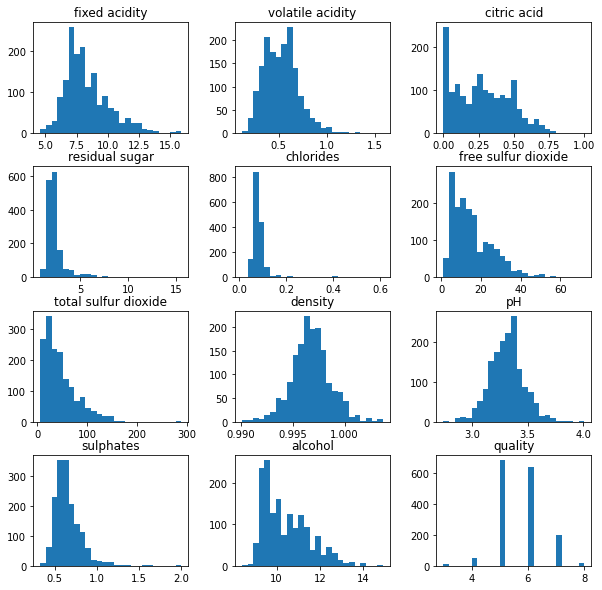

In [9]:
# Histogram Distribution of the data
wine_data.hist(bins=25,figsize=(10,10),grid=False)
# display histogram
plt.show()

#### The histograms show the distribution of each feature. The histogram also gives us an idea about the outliers in the given data set.


### Plotting the Relationship between Independent Variables and the Quality(Target Variable)

#### a) Fixed Acidity and Quality

'The relationship between fixed acidity and quality is ambiguous'

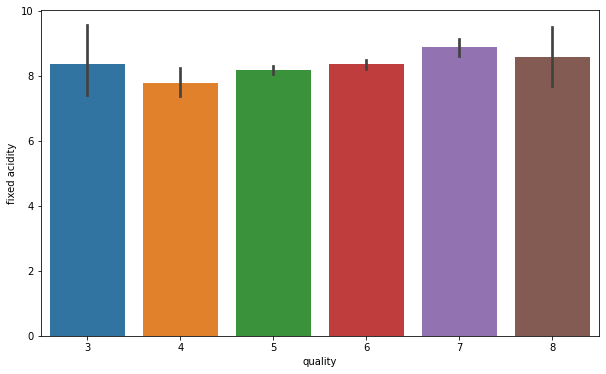

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_data)
'''The relationship between fixed acidity and quality is ambiguous'''

#### b) Volatile Acidity and Quality

'As the quality of wine increases, the volatile acidity decreases'

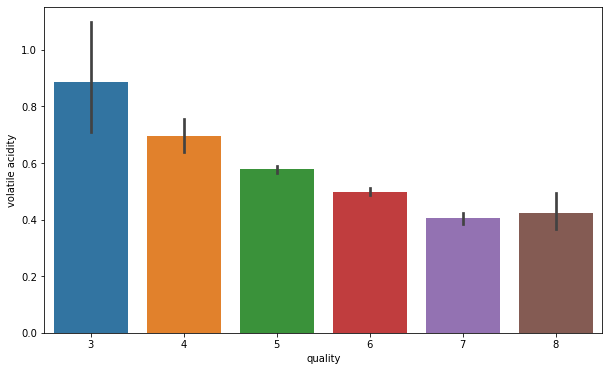

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_data)
'''As the quality of wine increases, the volatile acidity decreases'''

#### c) Citric acid and Quality

'As the quality of wine increases, the citric acid content increases'

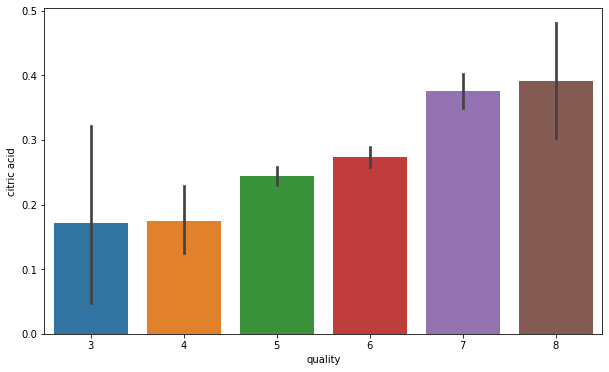

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_data)
'''As the quality of wine increases, the citric acid content increases'''

#### d) Residual Sugar and Quality

'The is no significant effect of residual sugar on the quality of wine'

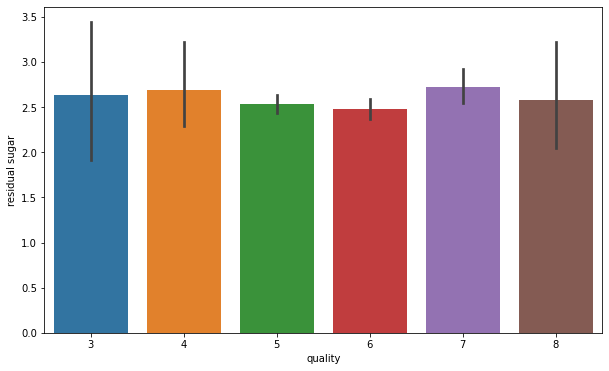

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine_data)
'''The is no significant effect of residual sugar on the quality of wine'''

#### e) Chlorides and Quality

'As the quality of wine increases, the chloride content decreases'

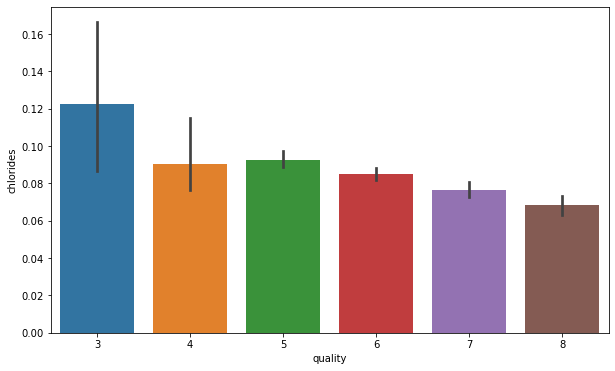

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine_data)
'''As the quality of wine increases, the chloride content decreases'''

#### f) Free Sulfur Dioxide and Quality

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

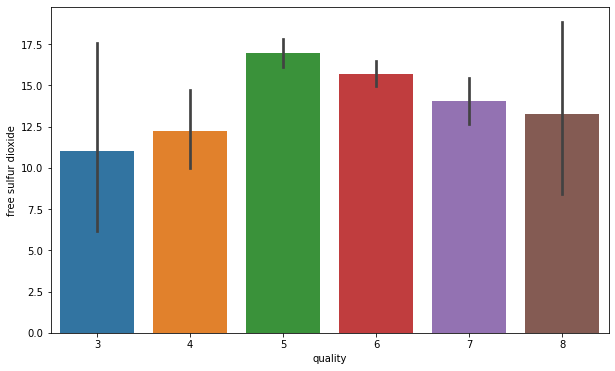

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine_data)


#### g) Total Sulfur Dioxide and Quality

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

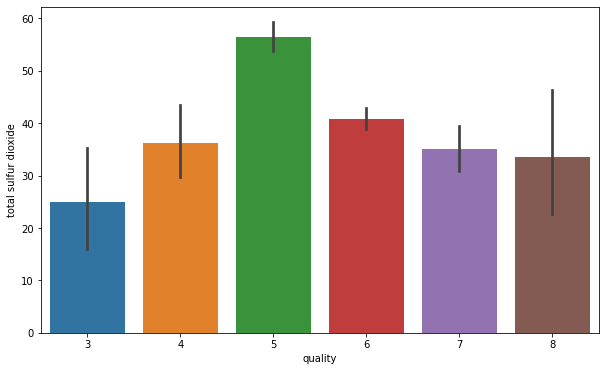

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine_data)


#### h) Density and Quality

'Density is statistically same irrespective of the quality of wine'

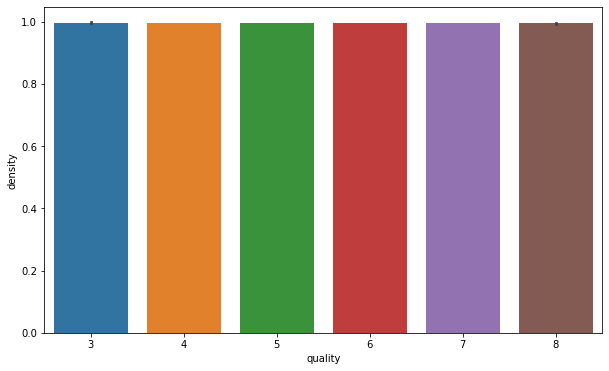

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = wine_data)
'''Density is statistically same irrespective of the quality of wine'''

#### i) pH and Quality

'There is a very slight decrease in the pH of the wine as quality increases'

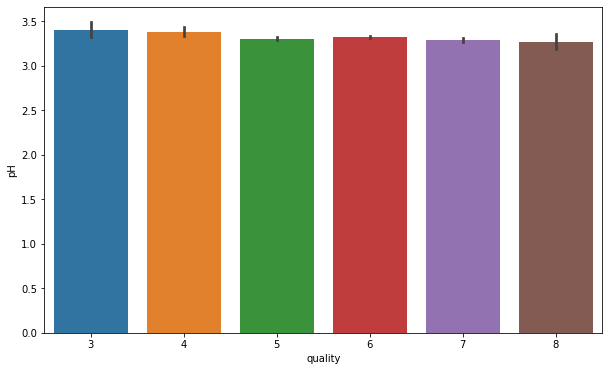

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = wine_data)
'''There is a very slight decrease in the pH of the wine as quality increases'''

#### k) Sulphates and Quality

'There is an increase in the sulphates content as the quality of wine increases'

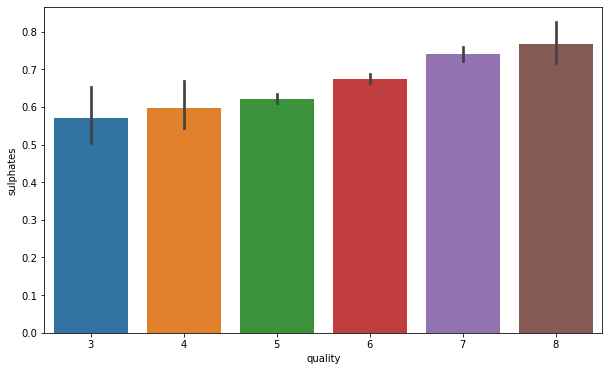

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_data)
'''There is an increase in the sulphates content as the quality of wine increases'''

#### l) Alcohol and Quality

'Alcohol content increases as the quality of wine increases'

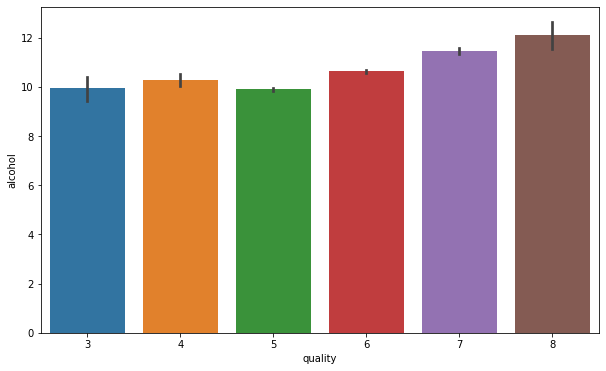

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine_data)
'''Alcohol content increases as the quality of wine increases'''

From the above analysis it is assumed that the following variables have higher importance in determining the quality of the wine
 - volatile acidity
 - citric acid
 - chlorides
 - sulphates
 - pH
 - alcohol

### Checking for Correlation among the variables

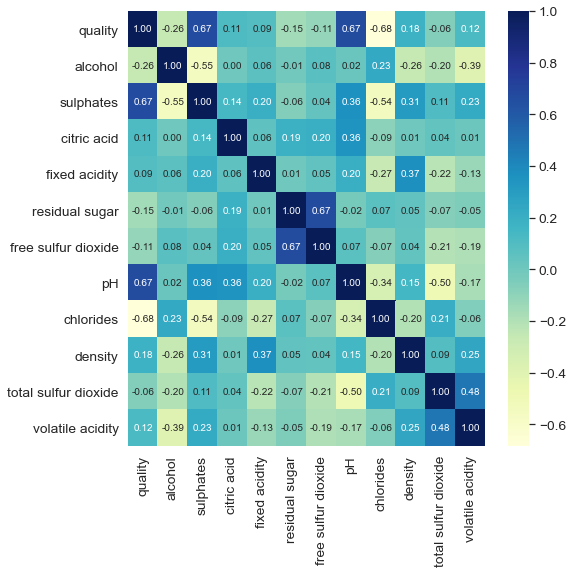

In [21]:
# Plotting the relationship between variables
plt.figure(figsize=(8,8))
corr_matrix = wine_data.corr()
cols = corr_matrix.nlargest(12,'quality')['quality'].index
cm = np.corrcoef(wine_data[cols].values.T)
sns.set(font_scale=1.25)
heatmap = sns.heatmap(corr_matrix,annot=True,fmt='.2f',annot_kws={'size': 10},cbar=True,yticklabels=cols.values, xticklabels=cols.values,cmap='YlGnBu')
plt.show()

There is a fairly positive correlation between:
- quality and pH (0.67)
- quality and sulphates (0.67)
- residual sugar and free sulfur dioxide (0.67)

There is a fairly negative correlation between:
- quality and chlorides (-0.68)
- alcohol and sulphates (-0.55)
- sulphates and chlorides (-0.54)
- pH and total sulfur dioxide (-0.50)

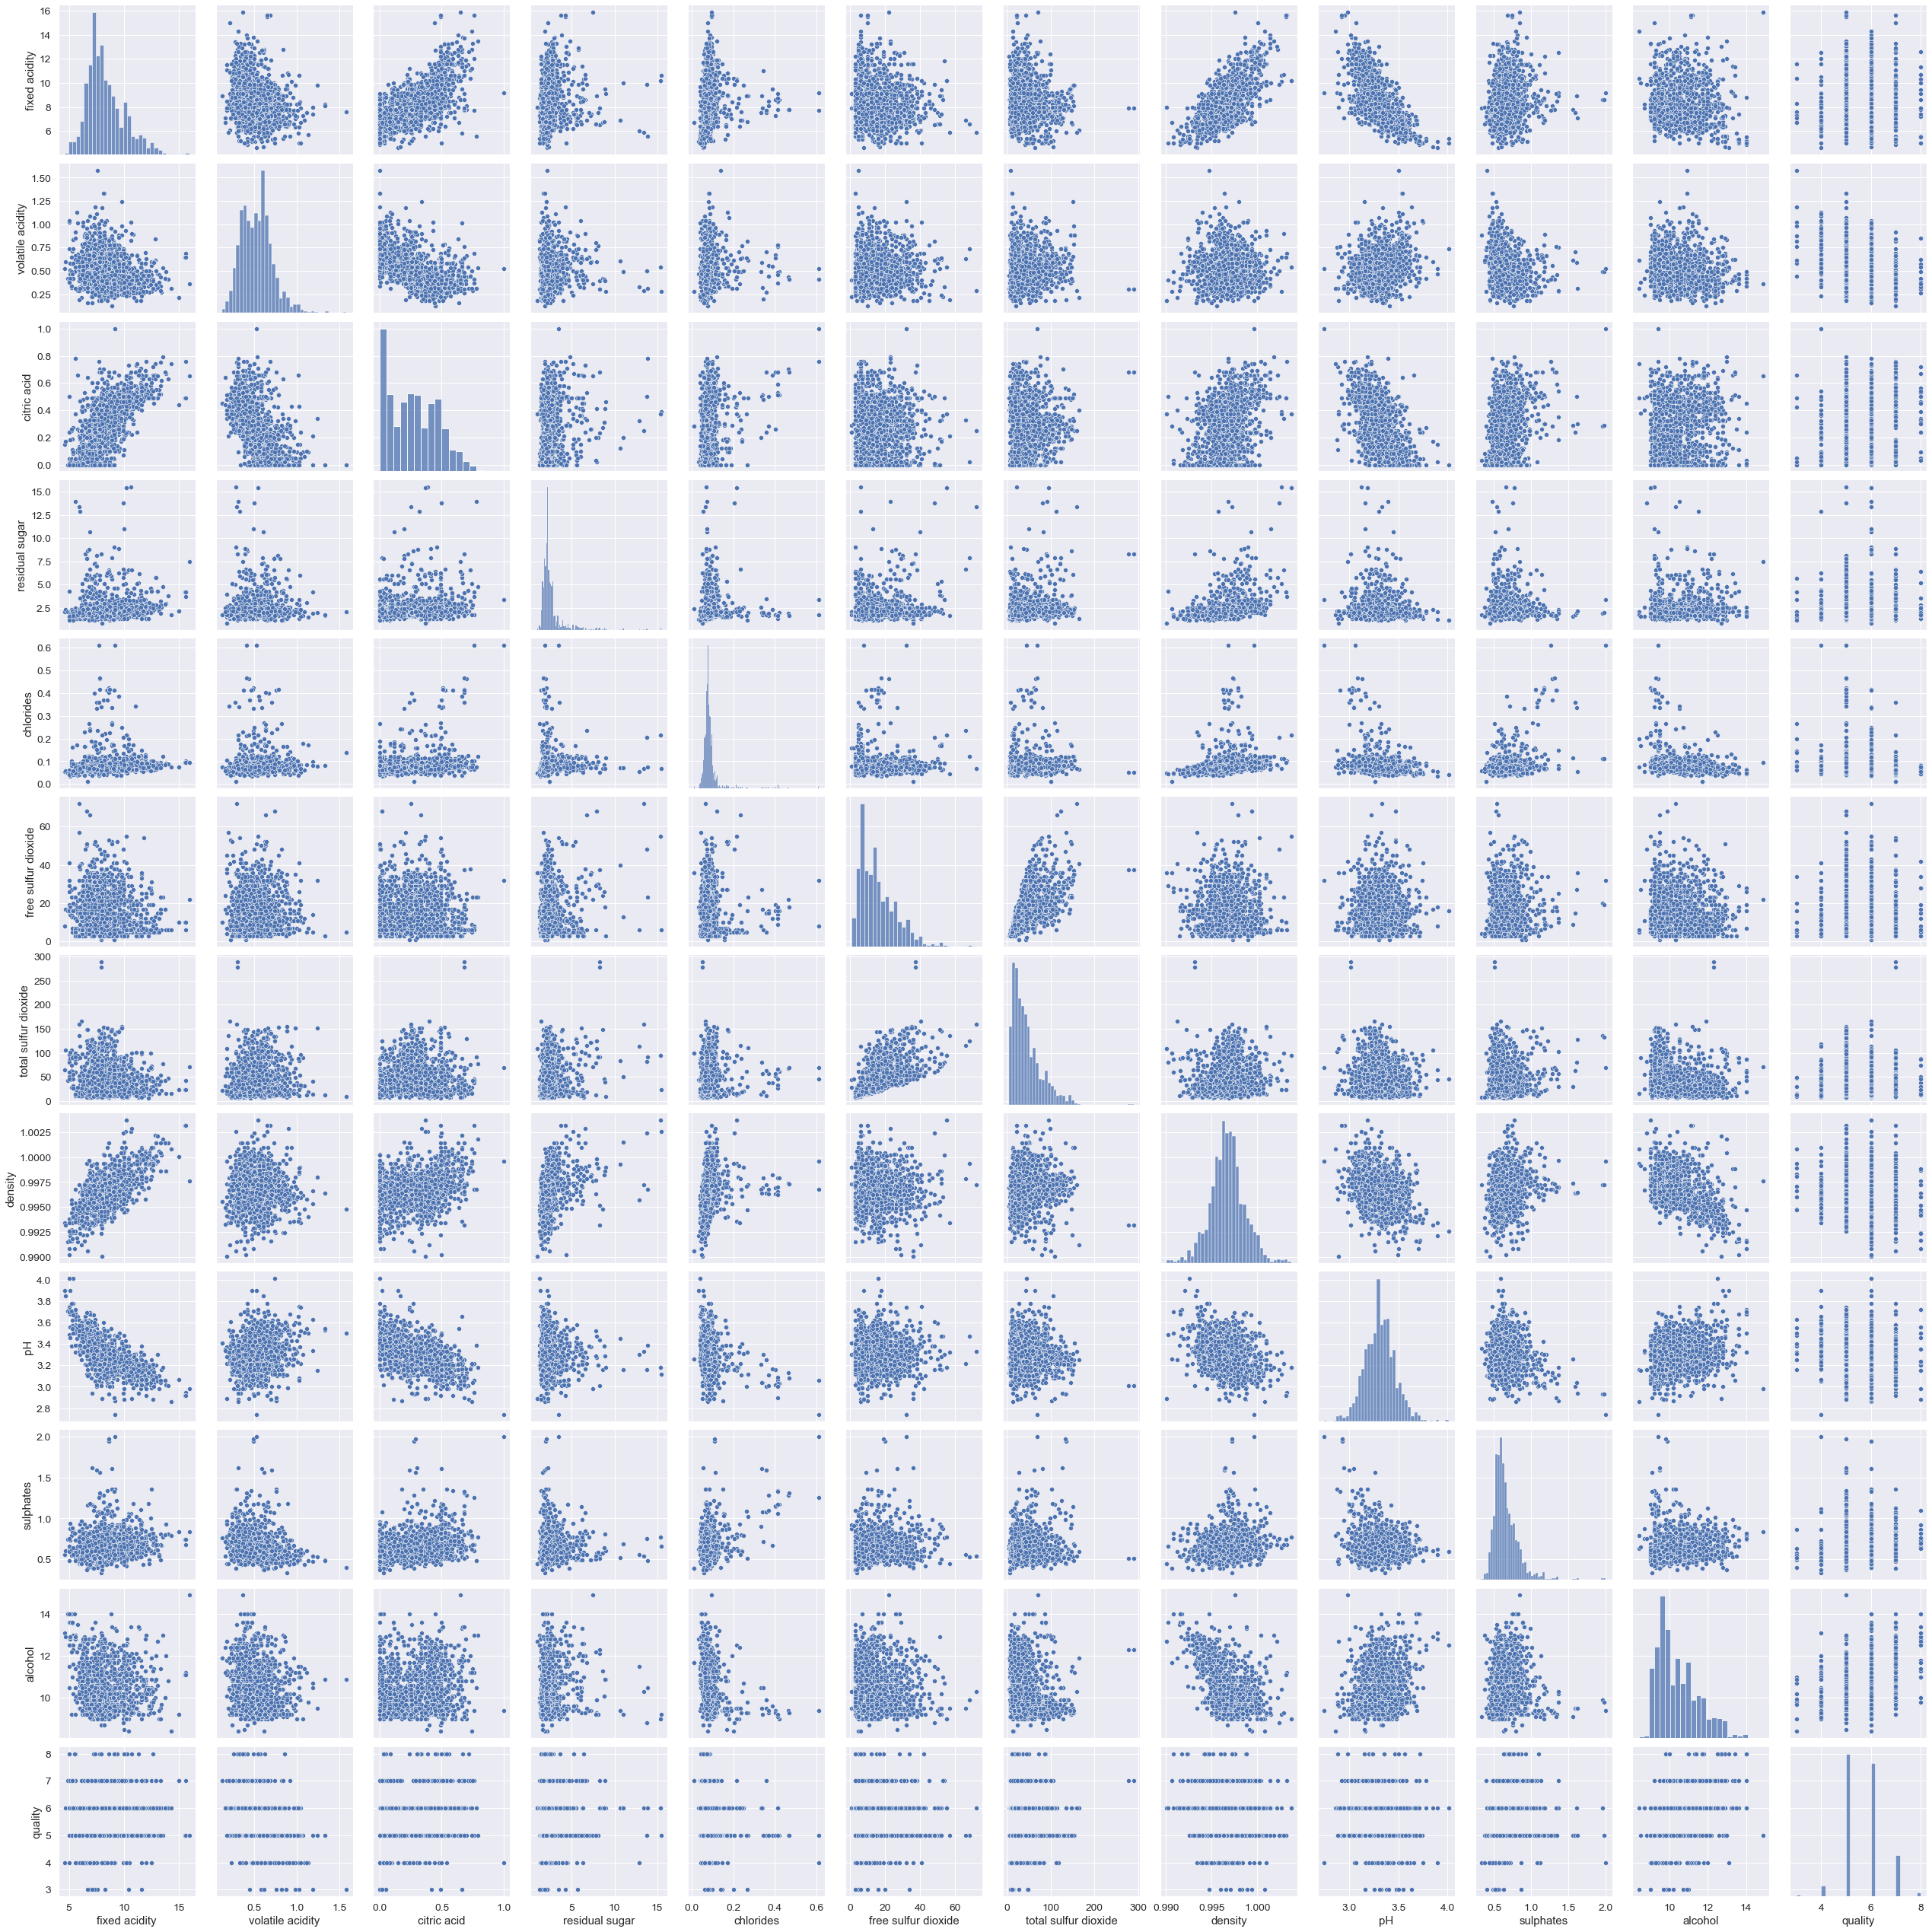

In [22]:
# Pair plots
sns.pairplot(wine_data,height=3.0)

### Outlier Detection

#### Plotting the important variables

#### a) volatile acidity

<AxesSubplot:xlabel='volatile acidity'>

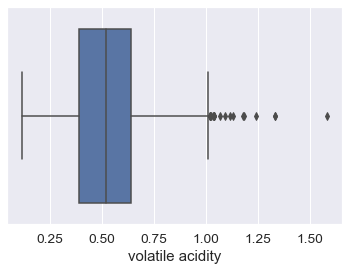

In [23]:
sns.boxplot(x = 'volatile acidity', data = wine_data)

In [24]:
'''There are outliers present in volatile acidity'''

'There are outliers present in volatile acidity'

#### b) citric acid

'There are very few outliers in the data'

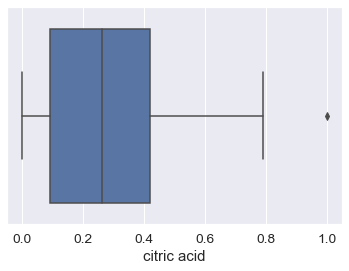

In [25]:
sns.boxplot(x = 'citric acid', data = wine_data)
'''There are very few outliers in the data'''

#### c) chlorides

'There are many outliers in the data'

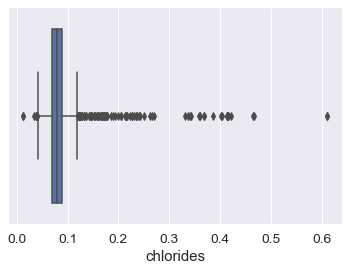

In [26]:
sns.boxplot(x = 'chlorides', data = wine_data)
'''There are many outliers in the data'''

#### d) sulphates

'There are many outliers in the data'

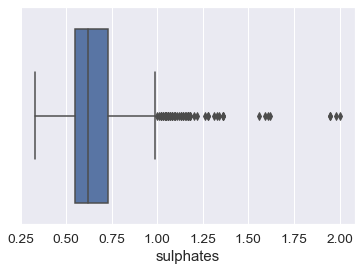

In [27]:
sns.boxplot(x = 'sulphates', data = wine_data)
'''There are many outliers in the data'''

#### e) pH

'There are some outliers in the data'

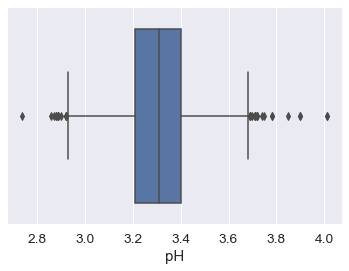

In [28]:
sns.boxplot(x = 'pH', data = wine_data)
'''There are some outliers in the data'''

#### f) alcohol

'There are very few outliers in the data'

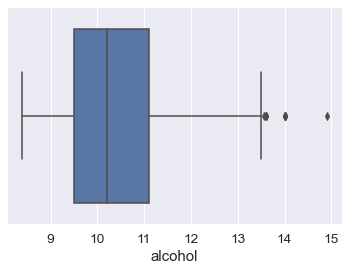

In [29]:
sns.boxplot(x = 'alcohol', data = wine_data)
'''There are very few outliers in the data'''

## Data Preprocessing

In [30]:
# Taking a copy of the wine_data. Preprocessing is done on the copy
wine_data_preprocessed = wine_data.copy()
wine_data_preprocessed.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### Removing highly correlated variables

There is a fairly strong correlation between "free sulfur dioxide" and "residual sugar". During analysis, it has been found that "residual sugar" does not vary significantly based on quality of the wine. Hence we can remove this column from our dataset.

In [31]:
# Removing the highly correlated variable
wine_data_preprocessed.drop(columns='residual sugar',inplace=True)
wine_data_preprocessed.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Adding new column 'wine rating' as the target variable

#### Assumption

In the given data set, the column 'quality' has values [3,4,5,6,7,8] indicating the quality of the wine. 
To enable us to create models that can rate the wine as Bad or Good, we make the following assuptions:
 - if the value of 'quality' is 7 or 8 the wine is Good
 - if the 'quality' of wine is 3,4,5 or 6, the wine is Bad
 
- 'Good' is represented by 1 while 'Bad' by 0
 

In [32]:
wine_data_preprocessed['wine rating']=[1 if x>=7 else 0 for x in wine_data_preprocessed.quality]
wine_data_preprocessed[wine_data_preprocessed['wine rating'] == 1].tail()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine rating
1541,7.4,0.25,0.29,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7,1
1544,8.4,0.37,0.43,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7,1
1549,7.4,0.36,0.30,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8,1
1555,7.0,0.56,0.17,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7,1
1584,6.7,0.32,0.44,0.061,24.0,34.0,0.99484,3.29,0.80,11.60,7,1


In [33]:
wine_data_preprocessed[wine_data_preprocessed['wine rating'] == 0]

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine rating
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


### Outlier Removal

In [34]:
# z-score method of Outlier Removal
z_scores = zscore(wine_data_preprocessed)

# taking the absolute values of the z-score
abs_z_scores = np.abs(z_scores)

# filter condition for z_score - An outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean
filtered_entries = (abs_z_scores < 3).all(axis=1)

# populating the data frame with data having only absolute z_score < 3
wine_data_preprocessed = wine_data_preprocessed[filtered_entries]

print(f"After outlier removal {wine_data_preprocessed.shape[0]} rows and {wine_data_preprocessed.shape[1]} columns are left")


After outlier removal 1469 rows and 12 columns are left


### Detection and Removal of Multi-Collinearity using Variance Inflation Factor(VIF)

In [35]:
wine_data_preprocessed.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality', 'wine rating'],
      dtype='object')

In [36]:
# Multicollinearity occurs when there are two or more independent variables in a regression model have a high correlation among themselves.
# When the features are highly collinear, it becomes difficult to determine their individual effect on the target variable
# Here we are using VIF method to determine the multi-collinearity

# Idea of VIF method
# In VIF method, it takes one column at a time as target and others as features and fits a Linear Regression model. 
# After this, it calculates the Rsquare value and for the VIF value, we take the inverse of 1-Rsquare i.e 1/(1-Rsquare).
# Hence after each iteration, we get VIF value for each column (which was taken as target above) in our dataset

# Higher the VIF, greater is the correlation between the variables
# VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

#Assumption
# Here we are considering only cases where VIF is greater than 10. If VIF is greater than 10 we will drop the variable

# All the independent variable
variables = wine_data_preprocessed[['fixed acidity', 'volatile acidity', 'citric acid',
                                    'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',]]

# adding an intercept
x = add_constant(variables)
vif = pd.DataFrame()

# calculating the VIF for each variable
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif.round(1)


,VIF,features
0,1356727.9,const
1,6.5,fixed acidity
2,1.9,volatile acidity
3,3.1,citric acid
4,1.2,chlorides
5,1.9,free sulfur dioxide
6,2.2,total sulfur dioxide
7,4.2,density
8,2.9,pH
9,1.3,sulphates


#### None of the columns have VIF > 10, so we are not dropping any columns

### Splitting the data into dependent and independent variables

In [37]:
# independent variables
X = wine_data_preprocessed.drop(['quality','wine rating'],axis=1)
# dependent variable
Y = wine_data_preprocessed['wine rating']
print('The independent variables: ')
print(X.columns)
print("")
print("")
print('The dependent variable: ')
print(Y.name)


The independent variables: 
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


The dependent variable: 
wine rating


### Splitting the data into Training set and Testing set

In [38]:
"""Train-Test Split is 80:20 i.e. 80% trainiing data and 20% testing data"""

'Train-Test Split is 80:20 i.e. 80% trainiing data and 20% testing data'

In [39]:
#Train and Test splitting of data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Standardizing the data

In [40]:
# Scaling the train and test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [41]:
## For comparing Different Models
model_comparison_df = pd.DataFrame(columns = ['model','accuracy','error_rate','auc']) 
model_comparison_df.set_index('model',inplace=True)
model_comparison_df

,accuracy,error_rate,auc
model,,,


### Decision Tree Classifier

In [42]:
# Creating a DecisionTreeClassifier with default values of hyper parameters
model_dt = DecisionTreeClassifier()
print("Deafult Parameters:\n\n\n" + str(model_dt.get_params(True))) 

Deafult Parameters:


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


#### Training the Model and Prediction

In [43]:

# trains the Decision Tree Model using the training sets(x_train,y_train)
model_dt.fit(X_train,Y_train)

# calculation of score(accuracy) of training
training_score = model_dt.score(X_train,Y_train)
print("Training Score: " + str(training_score))

# checking the score of testing
testing_score = model_dt.score(X_test,Y_test)
print("Testing Score: " + str(testing_score))

Training Score: 1.0
Testing Score: 0.8741496598639455


#### This is a case of overfitting as the Training Score is much higher than Testing score

#### Hyper Parameter Tuning using Grid Search CV

In [44]:
#predefined set of hyperparameters
paramlist = {'max_depth':range(1,15),
             'min_samples_split':range(2,10),
             'min_samples_leaf':range(20,51,10),
             'criterion': ['gini','entropy']}

# creating a DecisionTreeClassfierModel
decision_model = DecisionTreeClassifier(random_state=0)


start = time.time()
# creating an object of GridSearchCV
grid_cv = GridSearchCV(decision_model,cv=10,param_grid=paramlist)

# training the model
grid_cv.fit(X_train,Y_train)
end = time.time()

print('Best Parameters for Decision Tree Classifier using Grid Search CV : \n', grid_cv.best_params_)
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters for Decision Tree Classifier using Grid Search CV : 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50, 'min_samples_split': 2}
Time taken in grid search:  64.28


##### Creating Decision Tree based on result of GridSearchCV - CART

In [45]:
# Instatiating the CART model
cart_mdl = DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_leaf=50,min_samples_split=2,criterion='gini')
print("Parameters for CART model :\n\n\n" + str(cart_mdl.get_params(True)))

# Adding a row for Decision Tree Classifier in the model_comparison table
model_comparison_df = model_comparison_df.append({'model': 'Decision Tree Classifier'}, ignore_index=True)

Parameters for CART model :


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 50, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}


#### Training the Model and Prediction

In [46]:
# fitting the model with Training set
cart_mdl.fit(X_train,Y_train)

# calculation of Training score
training_score = cart_mdl.score(X_train,Y_train)
print("Training score :" + str(training_score))

# calculation of Test score
testing_score = cart_mdl.score(X_test,Y_test)
print("Testing score :" + str(testing_score))

Training score :0.8910638297872341
Testing score :0.8877551020408163


#### The Training Score and Testing score are statistically not very different

#### Evaluating the model

#### a) Classification Report

In [47]:
# predicting the values for X-test
prediction_cart= cart_mdl.predict(X_test)

cart_report = classification_report(Y_test, prediction_cart,output_dict=True)

print(classification_report(Y_test, prediction_cart))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       252
           1       0.76      0.31      0.44        42

    accuracy                           0.89       294
   macro avg       0.83      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294



#### Accuracy of the Decision Tree Classifier (CART) is 89%

#### b) Confusion Matrix

In [48]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

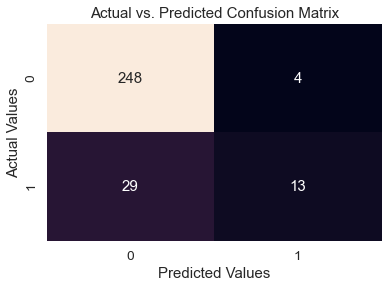

In [49]:
conf_mat = create_conf_mat(Y_test, prediction_cart)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

#### c) Accuracy

In [50]:
accuracy_cart = cart_mdl.score(X_test, Y_test)

print("Mean accuracy on the test set (when using Decision Tree Classifier (CART)):\n {0:.3f}"\
      .format(accuracy_cart))

## adding the accuracy to the comparison table
model_comparison_df.loc[[0],'accuracy'] = accuracy_cart
model_comparison_df

Mean accuracy on the test set (when using Decision Tree Classifier (CART)):
 0.888


,accuracy,error_rate,auc,model
0,0.887755,NaN,NaN,Decision Tree Classifier


#### d) Error Rate

In [51]:
test_error_rate_cart = 1 - accuracy_cart
print("The test error rate for the Decision Tree (CART) Classifier model is:\n {0: .4f}"\
      .format(test_error_rate_cart))

## adding the error rate to the comparison table
model_comparison_df.loc[[0],'error_rate'] = test_error_rate_cart
model_comparison_df

The test error rate for the Decision Tree (CART) Classifier model is:
  0.1122


,accuracy,error_rate,auc,model
0,0.887755,0.112245,NaN,Decision Tree Classifier


#### e) Area under the curve

In [52]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf','dt', 'lr']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'dt': ['Decision Tree', 'blue'],
               'lr': ['Logistic Regression', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

In [53]:
predictions_prob_cart = cart_mdl.predict_proba(X_test)[:, 1]

fpr_cart, tpr_cart, _ = roc_curve(Y_test,
                          predictions_prob_cart,
                          pos_label = 1)

# calculating area under the tpr-fpr curve
auc_cart = auc(fpr_cart, tpr_cart)

## adding the auc to the comparison table
model_comparison_df.loc[[0],'auc'] = auc_cart
model_comparison_df

,accuracy,error_rate,auc,model
0,0.887755,0.112245,0.849254,Decision Tree Classifier


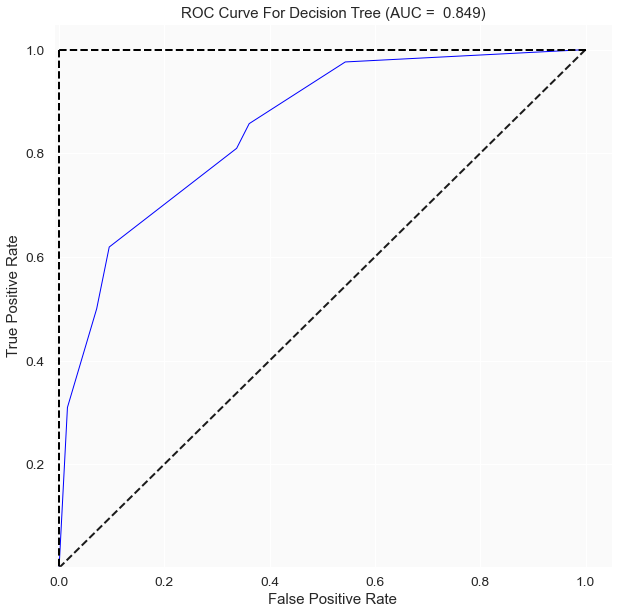

In [54]:
# plotting the roc curve 
plot_roc_curve(fpr_cart, tpr_cart, auc_cart, 'dt',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

#### The Area under the curve for the TPR-FPR curve is about 84.9%

In [55]:
## adding the precision and recall for Decision Tree Classifier (CART) to the comparison table
model_comparison_df.loc[[0],'precision'] = metrics.precision_score(Y_test,prediction_cart)
model_comparison_df.loc[[0],'recall'] = metrics.recall_score(Y_test,prediction_cart)
model_comparison_df

,accuracy,error_rate,auc,model,precision,recall
0,0.887755,0.112245,0.849254,Decision Tree Classifier,0.764706,0.309524


### Random Forest Classifier

In [56]:
# Creating a Random Forest Classifier with default values of hyper parameters
rf_model = RandomForestClassifier(random_state=0)
print("Deafult Parameters:\n\n\n" + str(rf_model.get_params(True))) 

Deafult Parameters:


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


#### Training the Model and Prediction

In [57]:
# training the Random Forest Classifier
rf_model.fit(X_train, Y_train)


# calculation of Training score
training_score_rf = rf_model.score(X_train,Y_train)
print("Training score :" + str(training_score_rf))

# calculation of Test score
testing_score_rf = rf_model.score(X_test,Y_test)
print("Testing score :" + str(testing_score_rf))

# predicting the values for X-test
prediction_rf= rf_model.predict(X_test)


Training score :1.0
Testing score :0.9081632653061225


#### Since the training score is higher than testing score, it indicates an overfit

#### Hyperparameter Optimization of RandomForest using GridSearchCV

In [58]:
# creating an instance of RandomForestClassifier
fit_rf = RandomForestClassifier(random_state=40)
np.random.seed(0)
start = time.time()

#  predefined set of parameters for GridSearchCV
param_dist = {'max_depth':[2,3,4,5],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(fit_rf,cv=10,param_grid=param_dist,n_jobs=3)

cv_rf.fit(X_train,Y_train)
print('Best Parameters for Random Forest using Grid search: \n',cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: %0.2f'%(end-start))

Best Parameters for Random Forest using Grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': None}
Time taken in grid search: 98.38


In [59]:
# setting the model with the best paramters suggested by GridSearchCV
fit_rf.set_params(bootstrap=True,criterion='gini',max_features = None,max_depth = 5)

RandomForestClassifier(max_depth=5, max_features=None, random_state=40)

#### Determining the number of trees using OOB rate

In [60]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 100
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, Y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 100 to 1000 Trees)')

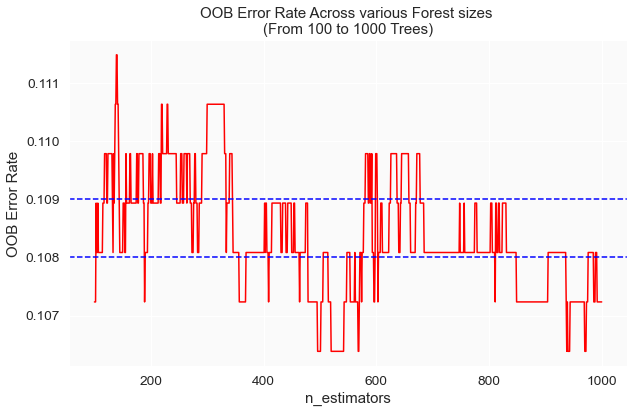

In [61]:
# Plotting the oob rate
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10,6))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.109,color='blue',linestyle='--')
plt.axhline(0.108,color='blue',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 100 to 1000 Trees)')

In [62]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[400]))

OOB Error rate for 400 trees is: 0.10809


#### When n_estimators = 400, the error rate relatively remains stable  so we choose n_estimators = 400

In [63]:
# fitting the random forest with n_estimators
fit_rf.set_params(n_estimators=400,bootstrap=True,warm_start=False,oob_score=False)
# fit_rf.set_params(bootstrap=True,criterion='gini',max_features = None,max_depth = 5)
print("The parameters of the random forest are: \n\n" + str(fit_rf.get_params(True)))

The parameters of the random forest are: 

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': 40, 'verbose': 0, 'warm_start': False}


#### Training the model

In [64]:
fit_rf.fit(X_train,Y_train)

# calculation of Training score
training_score_rf = fit_rf.score(X_train,Y_train)
print("Training score :" + str(training_score_rf))

# calculation of Test score
testing_score_rf = fit_rf.score(X_test,Y_test)
print("Testing score :" + str(testing_score_rf))

# predicting the values for X-test
prediction_rf= fit_rf.predict(X_test)

# Adding a row for Random Forest Classifier in the model_comparison table
model_comparison_df = model_comparison_df.append({'model': 'Random Forest Classifier'}, ignore_index=True)
model_comparison_df

Training score :0.9446808510638298
Testing score :0.9047619047619048


,accuracy,error_rate,auc,model,precision,recall
0,0.887755,0.112245,0.849254,Decision Tree Classifier,0.764706,0.309524
1,NaN,NaN,NaN,Random Forest Classifier,NaN,NaN


#### Evaluating the model

#### a) Classification Report

In [65]:
print(classification_report(Y_test, prediction_rf))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       252
           1       0.79      0.45      0.58        42

    accuracy                           0.90       294
   macro avg       0.85      0.72      0.76       294
weighted avg       0.90      0.90      0.89       294



#### Accuracy of the Random Forest Classifier is 90%

#### b) Confusion Matrix

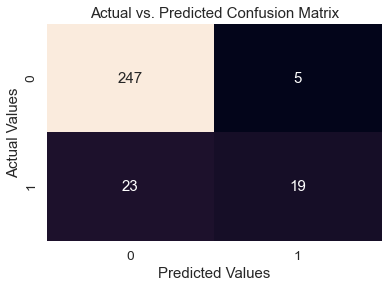

In [66]:
conf_mat = create_conf_mat(Y_test, prediction_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

#### c) Accuracy

In [67]:
accuracy_rf = fit_rf.score(X_test, Y_test)

print("Mean accuracy on the test set (when using Random Forest Classifier):\n {0:.3f}"\
      .format(accuracy_rf))

## adding the accuracy to the comparison table
model_comparison_df.loc[[1],'accuracy'] = accuracy_rf
model_comparison_df

Mean accuracy on the test set (when using Random Forest Classifier):
 0.905


,accuracy,error_rate,auc,model,precision,recall
0,0.887755,0.112245,0.849254,Decision Tree Classifier,0.764706,0.309524
1,0.904762,NaN,NaN,Random Forest Classifier,NaN,NaN


#### d) Error Rate

In [68]:
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for the Random Forest Classifier model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

## adding the error_rate to the comparison table
model_comparison_df.loc[[1],'error_rate'] = test_error_rate_rf
model_comparison_df

The test error rate for the Random Forest Classifier model is:
  0.0952


,accuracy,error_rate,auc,model,precision,recall
0,0.887755,0.112245,0.849254,Decision Tree Classifier,0.764706,0.309524
1,0.904762,0.0952381,NaN,Random Forest Classifier,NaN,NaN


#### e) Area Under the Curve

In [69]:
predictions_prob_rf = fit_rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(Y_test,
                          predictions_prob_rf,
                          pos_label = 1)

auc_rf = auc(fpr_rf, tpr_rf)
## adding the auc to the comparison table
model_comparison_df.loc[[1],'auc'] = auc_rf
model_comparison_df

,accuracy,error_rate,auc,model,precision,recall
0,0.887755,0.112245,0.849254,Decision Tree Classifier,0.764706,0.309524
1,0.904762,0.0952381,0.913076,Random Forest Classifier,NaN,NaN


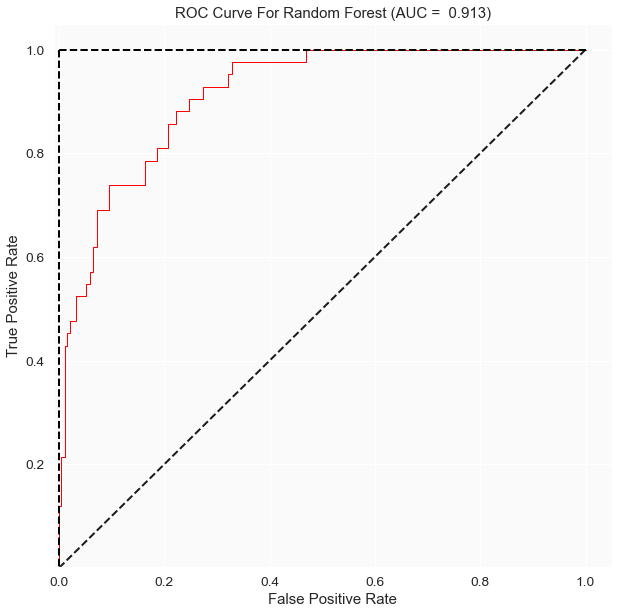

In [70]:
plot_roc_curve(fpr_rf, tpr_rf, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

#### The Area under the curve for the TPR-FPR curve is about 91.3%

In [71]:
## adding the precision and recall for Random Forest to the comparison table
model_comparison_df.loc[[1],'precision'] = metrics.precision_score(Y_test,prediction_rf)
model_comparison_df.loc[[1],'recall'] = metrics.recall_score(Y_test,prediction_rf)
model_comparison_df

,accuracy,error_rate,auc,model,precision,recall
0,0.887755,0.112245,0.849254,Decision Tree Classifier,0.764706,0.309524
1,0.904762,0.0952381,0.913076,Random Forest Classifier,0.791667,0.452381


#### Visualizing the Feature Importance

In [72]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' [is not an instantiated model from scikit-learn]".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [73]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(6,6))

#     ax.set_axis_bgcolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \nWine Quality Prediction')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 10)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

In [74]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']
print(indices_rf.shape)

(10,)


In [75]:
names_index = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'] 

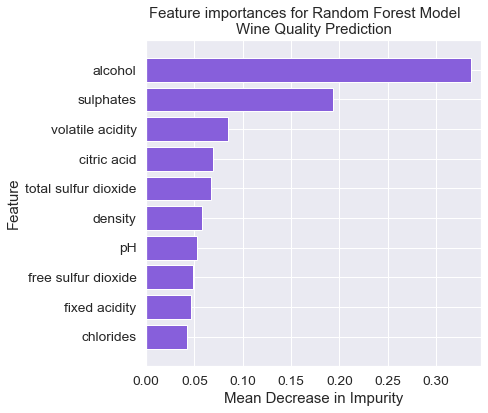

In [76]:
variable_importance_plot(importances_rf, indices_rf, names_index)

#### The three main features that determine the quality of wine are : alcohol, sulphates and density

### Logistic Regression

In [77]:
# Creating an instance of  Logistic Regression  with default values of hyper parameters
lr_model = LogisticRegression(random_state=0)
print("Deafult Parameters:\n\n\n" + str(lr_model.get_params(True)))

# Adding a row for Logistic Regression in the model_comparison table
model_comparison_df = model_comparison_df.append({'model': 'Logistic Regression'}, ignore_index=True)
model_comparison_df

Deafult Parameters:


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


,accuracy,error_rate,auc,model,precision,recall
0,0.887755,0.112245,0.849254,Decision Tree Classifier,0.764706,0.309524
1,0.904762,0.0952381,0.913076,Random Forest Classifier,0.791667,0.452381
2,NaN,NaN,NaN,Logistic Regression,NaN,NaN


#### Training the model and Prediction

In [78]:
# fitting the Logistic Regression model with the training data and training output
lr_model.fit(X_train, Y_train)

# predicting the values for X-test
prediction_lr= lr_model.predict(X_test)

#### Evaluating the model

#### a) Classification Report

In [79]:
 print(classification_report(Y_test, prediction_lr))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       252
           1       0.71      0.40      0.52        42

    accuracy                           0.89       294
   macro avg       0.81      0.69      0.73       294
weighted avg       0.88      0.89      0.88       294



#### Accuracy of the Logistic Regression Model is 89%

#### b) Confusion Matrix

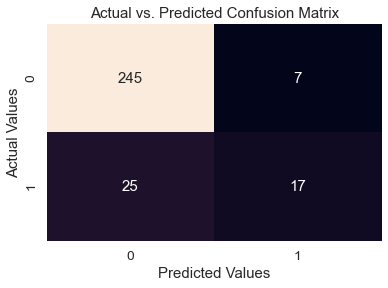

In [80]:
conf_mat = create_conf_mat(Y_test, prediction_lr)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

#### c) Accuracy

In [81]:
accuracy_lr = lr_model.score(X_test, Y_test)

print("Mean accuracy on the test set (when using Logistic Regression):\n {0:.3f}"\
      .format(accuracy_lr))

## adding the auc to the comparison table
model_comparison_df.loc[[2],'accuracy'] = accuracy_lr
model_comparison_df

Mean accuracy on the test set (when using Logistic Regression):
 0.891


,accuracy,error_rate,auc,model,precision,recall
0,0.887755,0.112245,0.849254,Decision Tree Classifier,0.764706,0.309524
1,0.904762,0.0952381,0.913076,Random Forest Classifier,0.791667,0.452381
2,0.891156,NaN,NaN,Logistic Regression,NaN,NaN


#### d) Error Rate

In [82]:
test_error_rate_lr = 1 - accuracy_lr
print("The test error rate for the Logistic Regression model is:\n {0: .4f}"\
      .format(test_error_rate_lr))

## adding the error_rate to the comparison table
model_comparison_df.loc[[2],'error_rate'] = test_error_rate_lr
model_comparison_df

The test error rate for the Logistic Regression model is:
  0.1088


,accuracy,error_rate,auc,model,precision,recall
0,0.887755,0.112245,0.849254,Decision Tree Classifier,0.764706,0.309524
1,0.904762,0.0952381,0.913076,Random Forest Classifier,0.791667,0.452381
2,0.891156,0.108844,NaN,Logistic Regression,NaN,NaN


#### e) Area under the curve

In [83]:
predictions_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# calculating the FPR and TPR
fpr_lr, tpr_lr, _lr = roc_curve(Y_test,
                          predictions_prob_lr,
                          pos_label = 1)

# calculating the area under the curve
auc_lr = auc(fpr_lr, tpr_lr)

## adding the auc to the comparison table
model_comparison_df.loc[[2],'auc'] = auc_lr
model_comparison_df

,accuracy,error_rate,auc,model,precision,recall
0,0.887755,0.112245,0.849254,Decision Tree Classifier,0.764706,0.309524
1,0.904762,0.0952381,0.913076,Random Forest Classifier,0.791667,0.452381
2,0.891156,0.108844,0.900605,Logistic Regression,NaN,NaN


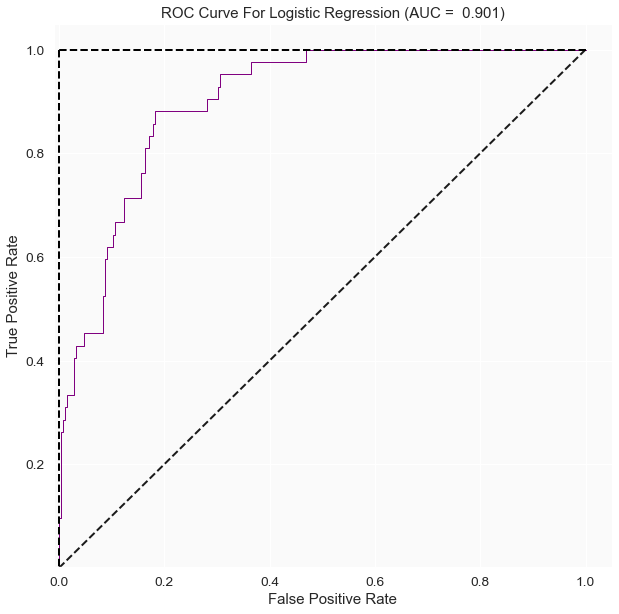

In [84]:
plot_roc_curve(fpr_lr, tpr_lr, auc_lr, 'lr',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

#### The Area under the curve for the TPR-FPR curve is about 90.1%

In [85]:
## adding the precision and recall for Logistic Regression to the comparison table
model_comparison_df.loc[[2],'precision'] = metrics.precision_score(Y_test,prediction_lr)
model_comparison_df.loc[[2],'recall'] = metrics.recall_score(Y_test,prediction_lr)
model_comparison_df

,accuracy,error_rate,auc,model,precision,recall
0,0.887755,0.112245,0.849254,Decision Tree Classifier,0.764706,0.309524
1,0.904762,0.0952381,0.913076,Random Forest Classifier,0.791667,0.452381
2,0.891156,0.108844,0.900605,Logistic Regression,0.708333,0.404762


### K - Nearest Neighbor

In [86]:
# creating a KNN classifier where K = 1
knn_1_model = KNeighborsClassifier(n_neighbors=1)
print("Deafult Parameters:\n\n\n" + str(knn_1_model.get_params(True)))

Deafult Parameters:


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [87]:
# fitting the KNN model with the training data and training output
knn_1_model.fit(X_train, Y_train)

# calculation of Training score
training_score_knn = knn_1_model.score(X_train,Y_train)
print("Training score :" + str(training_score_knn))

# calculation of Test score
testing_score_knn = knn_1_model.score(X_test,Y_test)
print("Testing score :" + str(testing_score_knn))

Training score :1.0
Testing score :0.891156462585034


#### The training score is much higher than the testing score indicating an overfit

#### Choosing a optimal value for K

In [88]:
# Computing the cross validation accuracy for different values of K
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,Y_train,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

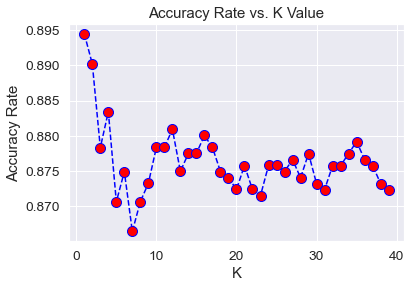

In [89]:
# Plotting the Accuracy Rate
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [90]:
# Computing the cross validation error rate (i.e 1-accuracy_rate) for different values of K
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,Y_train,cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

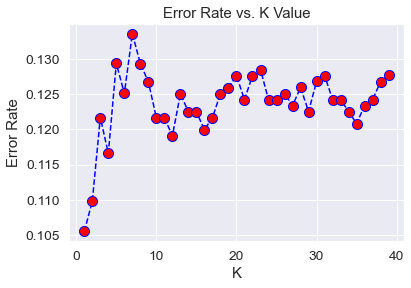

In [91]:
# Plotting the error_rate

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

 - From the plot of accuracy rate, we see that beyond K=20, the accuracy is varies slightly between 0.870 and 0.880
 - From the plot of error rate, we see that beyonf K=20, the error rate varies 0.120 and 0.130
 - so we choose K = 21

In [92]:
# Creating an instance of  K-Nearest Neighbor  with K= 21
knn_20_model = KNeighborsClassifier(n_neighbors=21)
print("Deafult Parameters:\n\n\n" + str(knn_20_model.get_params(True)))

# Adding a row for K-Nearest Neighbor in the model_comparison table
model_comparison_df = model_comparison_df.append({'model': 'K-Nearest Neighbor'}, ignore_index=True)
model_comparison_df

Deafult Parameters:


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 21, 'p': 2, 'weights': 'uniform'}


,accuracy,error_rate,auc,model,precision,recall
0,0.887755,0.112245,0.849254,Decision Tree Classifier,0.764706,0.309524
1,0.904762,0.0952381,0.913076,Random Forest Classifier,0.791667,0.452381
2,0.891156,0.108844,0.900605,Logistic Regression,0.708333,0.404762
3,NaN,NaN,NaN,K-Nearest Neighbor,NaN,NaN


#### Training the model and Prediction

In [93]:
# fitting the KNN model with the training data and training output
knn_20_model.fit(X_train, Y_train)

# predicting the values for X-test
prediction_knn= knn_20_model.predict(X_test)

#### Evaluating the model

#### a) Classification Report

In [94]:
# predicting the values for X-test
knn_report = classification_report(Y_test, prediction_knn,output_dict=True)

print(classification_report(Y_test, prediction_cart))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       252
           1       0.76      0.31      0.44        42

    accuracy                           0.89       294
   macro avg       0.83      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294



#### Accuracy of the KNN Classifier is 89%

#### b) Confusion Matrix

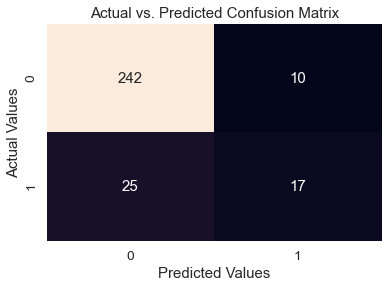

In [95]:
conf_mat = create_conf_mat(Y_test, prediction_knn)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

#### c) Accuracy

In [96]:
accuracy_knn = knn_20_model.score(X_test, Y_test)

print("Mean accuracy on the test set (when using KNN Classifier):\n {0:.3f}"\
      .format(accuracy_knn))

## adding the auc to the comparison table
model_comparison_df.loc[[3],'accuracy'] = accuracy_knn
model_comparison_df

Mean accuracy on the test set (when using KNN Classifier):
 0.881


,accuracy,error_rate,auc,model,precision,recall
0,0.887755,0.112245,0.849254,Decision Tree Classifier,0.764706,0.309524
1,0.904762,0.0952381,0.913076,Random Forest Classifier,0.791667,0.452381
2,0.891156,0.108844,0.900605,Logistic Regression,0.708333,0.404762
3,0.880952,NaN,NaN,K-Nearest Neighbor,NaN,NaN


#### d) Error Rate

In [97]:
test_error_rate_knn = 1 - accuracy_knn
print("The test error rate for the KNN model is:\n {0: .4f}"\
      .format(test_error_rate_knn))

## adding the error_rate to the comparison table
model_comparison_df.loc[[3],'error_rate'] = test_error_rate_knn
model_comparison_df

The test error rate for the KNN model is:
  0.1190


,accuracy,error_rate,auc,model,precision,recall
0,0.887755,0.112245,0.849254,Decision Tree Classifier,0.764706,0.309524
1,0.904762,0.0952381,0.913076,Random Forest Classifier,0.791667,0.452381
2,0.891156,0.108844,0.900605,Logistic Regression,0.708333,0.404762
3,0.880952,0.119048,NaN,K-Nearest Neighbor,NaN,NaN


#### e) Area under the Curve

In [98]:
predictions_prob_knn = knn_20_model.predict_proba(X_test)[:, 1]

# calculating the FPR and TPR
fpr_knn, tpr_knn, _knn = roc_curve(Y_test,
                          predictions_prob_knn,
                          pos_label = 1)

# calculating the area under the curve
auc_knn = auc(fpr_knn, tpr_knn)

## adding the auc to the comparison table
model_comparison_df.loc[[3],'auc'] = auc_knn
model_comparison_df

,accuracy,error_rate,auc,model,precision,recall
0,0.887755,0.112245,0.849254,Decision Tree Classifier,0.764706,0.309524
1,0.904762,0.0952381,0.913076,Random Forest Classifier,0.791667,0.452381
2,0.891156,0.108844,0.900605,Logistic Regression,0.708333,0.404762
3,0.880952,0.119048,0.876701,K-Nearest Neighbor,NaN,NaN


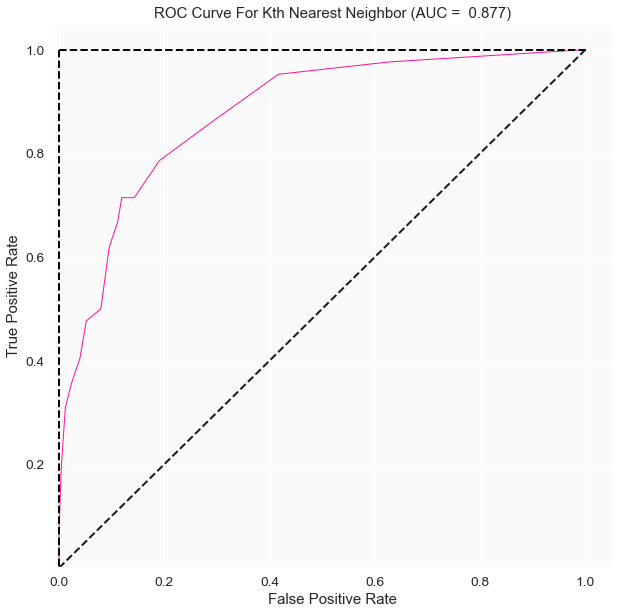

In [99]:
plot_roc_curve(fpr_knn, tpr_knn, auc_knn, 'knn',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

#### The Area under the curve for the TPR-FPR curve is about 87.7%

In [100]:
## adding the precision and recall for Logistic Regression to the comparison table
model_comparison_df.loc[[3],'precision'] = metrics.precision_score(Y_test,prediction_knn)
model_comparison_df.loc[[3],'recall'] = metrics.recall_score(Y_test,prediction_knn)

### Comparison of Machine Learning Models

In [102]:
# setting model as the index
#model_comparison_df.drop(columns = ['Accuracy','Error_Rate','AUC'],inplace=True)
model_comparison_df.set_index(["model"], inplace = True)
HTML(model_comparison_df.to_html(classes='table-bordered'))


,accuracy,error_rate,auc,precision,recall
model,,,,,
Decision Tree Classifier,0.887755,0.112245,0.849254,0.764706,0.309524
Random Forest Classifier,0.904762,0.0952381,0.913076,0.791667,0.452381
Logistic Regression,0.891156,0.108844,0.900605,0.708333,0.404762
K-Nearest Neighbor,0.880952,0.119048,0.876701,0.629630,0.404762


### Conclusion

 - In terms of model accuracy, the best model for predicting the wine quality (as Good and Bad) is Random Forest Classifier
 - The top three parameters which determine the quality of wine are Alcohol, Sulphates and Volatile Acidity   